# Mag TOV (Uniform Grid)

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Scaling

M/day
       G64: [ 1.02e+04, 1.85e+04, 2.95e+04, 4.52e+04,]
      G128: [ 1.25e+04, 2.17e+04, 3.34e+04, 4.57e+04,]
      G256: [ 1.25e+04, 2.17e+04, 3.34e+04, 4.48e+04,]
      G128: [ 3.08e+03, 5.48e+03, 8.94e+03, 1.07e+04,]
      G256: [ 3.13e+03, 5.46e+03, 9.07e+03, 1.30e+04,]
      G512: [ 3.19e+03, 5.49e+03, 9.08e+03, 1.00e+04,]
      G128: [ 6.98e+02, 1.32e+03, 2.40e+03,]
      G256: [ 7.51e+02, 1.36e+03, 2.16e+03,]
      G512: [ 7.58e+02, 1.43e+03, 2.36e+03,]
Zcs/sec
       G64: [ 5.03e+07, 9.12e+07, 1.46e+08, 2.23e+08,]
      G128: [ 6.17e+07, 1.07e+08, 1.65e+08, 2.26e+08,]
      G256: [ 6.16e+07, 1.07e+08, 1.65e+08, 2.22e+08,]
      G128: [ 2.44e+08, 4.34e+08, 7.08e+08, 9.54e+08,]
      G256: [ 2.48e+08, 4.32e+08, 7.17e+08, 1.03e+09,]
      G512: [ 2.52e+08, 4.35e+08, 7.18e+08, 9.95e+08,]
      G128: [ 8.88e+08, 1.71e+09, 3.15e+09,]
      G256: [ 9.51e+08, 1.76e+09, 2.99e+09,]
      G512: [ 9.61e+08, 1.81e+09, 3.14e+09,]


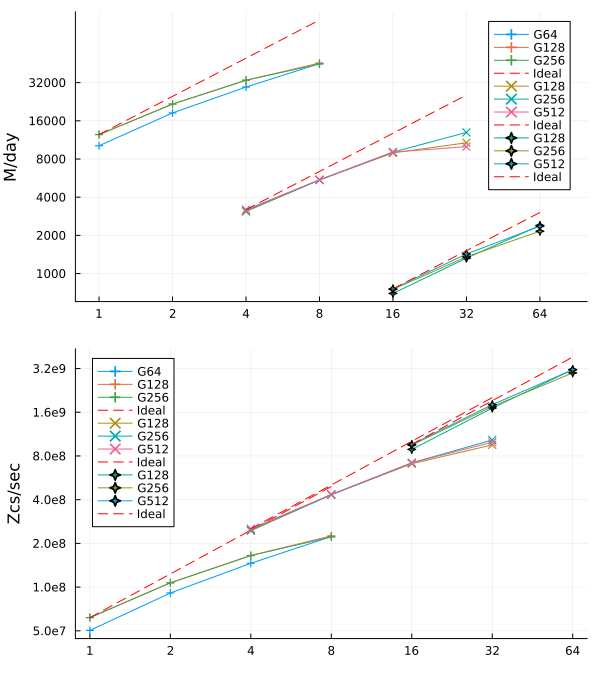

In [2]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
        ], "../data/magTOV/Uniform/magTOV-n256", :cross),
        ([
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/Uniform/magTOV-n512", :xcross),
        ([
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/Uniform/magTOV-n1024", :star4),
    ]

    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10, xlim=(0.8, 100))
    xs = [1, 2, 4, 8, 16, 32, 64]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1000, 2000, 4000, 8000, 16000, 32000]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime", is_plot_ideal=true, is_print_value=true)

    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [1, 2, 4, 8, 16, 32, 64]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [5e7, 1e8, 2e8, 4e8, 8e8, 1.6e9, 3.2e9]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)

    # Sum
    plt = plot(plt1, plt2, layout=(2,1), size = (600, 675))
    display(plt)
end

## Speed

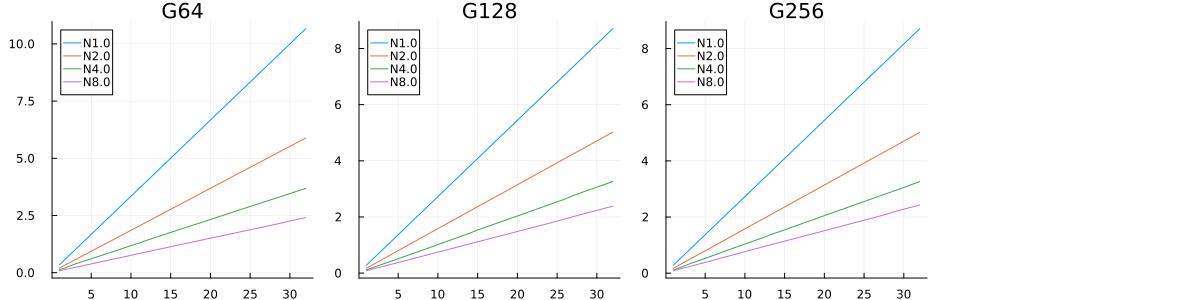

In [3]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G64-N\d+-MPI\d+_r0000", "G64"),
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
        ], "../data/magTOV/Uniform/magTOV-n256", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end

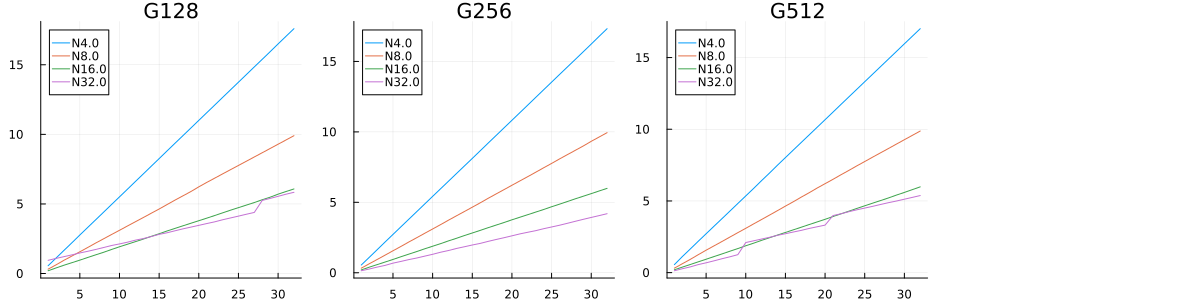

In [4]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/Uniform/magTOV-n512", :xcross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end

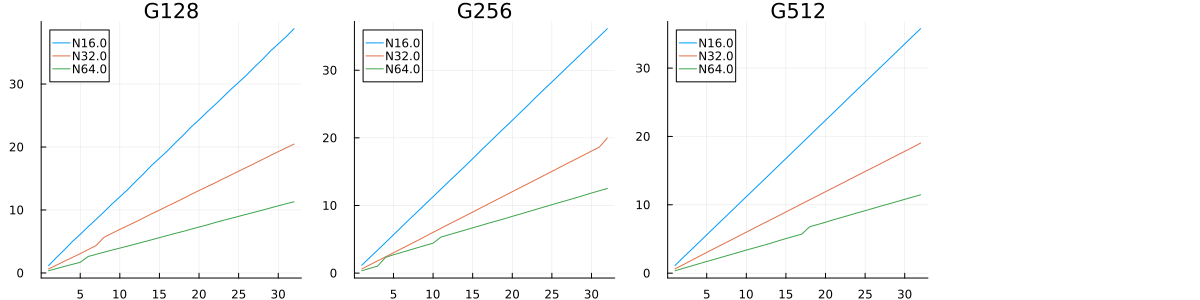

In [5]:
let patt_dirss = [
        ([
            (r"Cow_UNI_G128-N\d+-MPI\d+_r0000", "G128"),
            (r"Cow_UNI_G256-N\d+-MPI\d+_r0000", "G256"),
            (r"Cow_UNI_G512-N\d+-MPI\d+_r0000", "G512"),
        ], "../data/magTOV/Uniform/magTOV-n1024", :star4),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end